In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

path = r'C:\Users\kwankwan\Desktop\Python\HX_data_test1.xlsx'
df=pd.read_excel(path)
df.head()

,HX-t-in,HX-p-in,HX-t-out,Propane-p-out,HX-f-in,Propane-t-out,Sep-f-btm,Hysys
0,5.483097,3154.211211,195.734052,-12.909215,174.569775,-0.711282,21.960553,22.80
1,5.400112,3099.087037,205.036858,-10.853614,198.952514,3.608954,19.528031,20.96
2,5.220061,3091.193215,204.996293,-11.156654,188.964880,6.331245,20.050560,21.26
3,8.830960,3019.843617,298.716669,-7.588669,184.435358,-2.879586,25.921241,24.40
4,7.480344,3032.589421,294.831737,-9.810500,194.007952,-4.533174,27.723112,27.72


In [7]:
df['Error']= abs((df['Hysys']-df['Sep-f-btm']) / df['Sep-f-btm'] *100)
df.describe()

,HX-t-in,HX-p-in,HX-t-out,Propane-p-out,HX-f-in,Propane-t-out,Sep-f-btm,Hysys,Error
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,7.861563,3129.600628,247.269353,-8.834621,199.223105,-1.181345,22.081866,22.597838,5.594800
std,1.482312,78.094412,24.334040,1.930655,9.508336,3.289823,2.249107,2.499064,4.139482
min,3.807574,3016.493016,180.846591,-12.909215,174.569775,-4.819975,18.631663,17.350000,0.011224
25%,6.912880,3067.231926,237.830514,-10.267037,194.160372,-3.059014,20.482398,20.550000,2.086892
50%,7.621866,3109.080269,250.539138,-9.346185,198.308182,-2.570922,21.578538,22.660000,5.154451
75%,9.041238,3175.530345,257.530056,-7.273460,202.518803,-0.814711,23.143676,24.395000,7.971884
max,11.293963,3352.270071,301.674263,-5.016288,219.029620,12.780691,29.092075,29.250000,17.907673


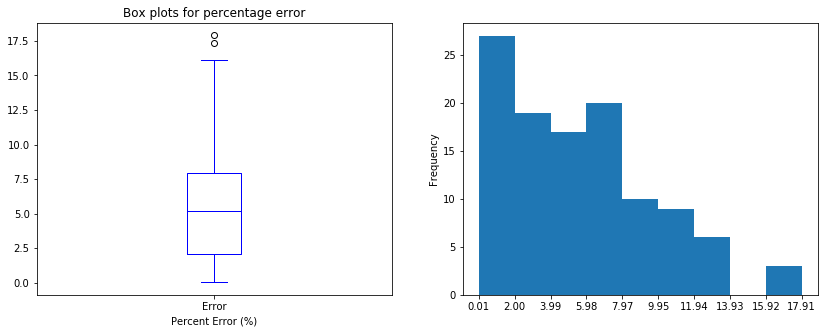

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
df['Error'].plot(kind='box', figsize=(14,5), color='blue', ax=ax1)
ax1.set_title('Box plots for percentage error')
ax1.set_xlabel('Percent Error (%)')

ax2 = fig.add_subplot(1,2,2)
count, bin_edges = np.histogram(df['Error'],9)
df['Error'].plot(kind='hist', bins=9, xticks=bin_edges, ax=ax2)

plt.show()

In [34]:
df.corr()

,HX-t-in,HX-p-in,HX-t-out,Propane-p-out,HX-f-in,Propane-t-out,Sep-f-btm,Hysys,Error
HX-t-in,1.000000,-0.178047,0.518471,0.938543,-0.286138,-0.327115,-0.159256,-0.528845,-0.203310
HX-p-in,-0.178047,1.000000,-0.150633,0.064252,0.307820,0.331892,-0.016593,0.019172,0.229269
HX-t-out,0.518471,-0.150633,1.000000,0.476311,-0.022666,-0.206932,0.650451,0.401029,-0.197093
Propane-p-out,0.938543,0.064252,0.476311,1.000000,-0.182873,-0.114620,-0.218428,-0.585539,-0.132770
HX-f-in,-0.286138,0.307820,-0.022666,-0.182873,1.000000,0.568200,-0.031001,0.235100,0.220604
Propane-t-out,-0.327115,0.331892,-0.206932,-0.114620,0.568200,1.000000,-0.196909,-0.029551,0.243253
Sep-f-btm,-0.159256,-0.016593,0.650451,-0.218428,-0.031001,-0.196909,1.000000,0.832024,-0.315333
Hysys,-0.528845,0.019172,0.401029,-0.585539,0.235100,-0.029551,0.832024,1.000000,0.012714
Error,-0.203310,0.229269,-0.197093,-0.132770,0.220604,0.243253,-0.315333,0.012714,1.000000


In [50]:
lm1 = LinearRegression()
X = df[['HX-t-in', 'HX-p-in', 'HX-t-out', 'Propane-p-out', 'HX-f-in', 'Propane-t-out']]
Y = df[['Hysys']]
lm1.fit(X,Y)

Yhat = lm1.predict(X)
print(lm1.intercept_, lm1.coef_)

lm1.score(X,Y)

[-40.11547732] [[ 0.1148805   0.00792924  0.09478937 -1.43157604  0.00440549 -0.02642942]]


0.9914152416555975